### Pengenalan Shapely dan Konsep Dasar Geometri

In [19]:
from shapely.geometry import Point, MultiPoint

# Membuat titik dengan koordinat (106.8456, -6.2088) yang mewakili Jakarta
point = Point(106.8456, -6.2088)
print(point)

POINT (106.8456 -6.2088)


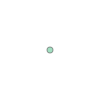

In [5]:
point

In [6]:
from shapely.geometry import LineString

# Membuat garis dari Jakarta ke Bandung
line = LineString([(106.8456, -6.2088), (107.6191, -6.9175)])
print(line)

LINESTRING (106.8456 -6.2088, 107.6191 -6.9175)


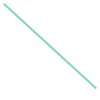

In [7]:
line

In [8]:
from shapely.geometry import Polygon

# Membuat poligon segitiga
polygon = Polygon([(106.8456, -6.2088), (107.6191, -6.9175), (108.2088, -6.2088)])
print(polygon)

POLYGON ((106.8456 -6.2088, 107.6191 -6.9175, 108.2088 -6.2088, 106.8456 -6.2088))


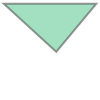

In [9]:
polygon

In [10]:
# Membuat dua poligon
polygon1 = Polygon([(0, 0), (2, 0), (1, 2)])
polygon2 = Polygon([(1, 0), (3, 0), (2, 2)])

# Menemukan area perpotongan
intersection = polygon1.intersection(polygon2)
print(intersection)

POLYGON ((1 0, 1.5 1, 2 0, 1 0))


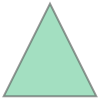

In [11]:
intersection

In [12]:
# Menggabungkan dua poligon
union = polygon1.union(polygon2)
print(union)

POLYGON ((0 0, 1 2, 1.5 1, 2 2, 3 0, 2 0, 1 0, 0 0))


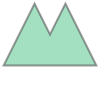

In [13]:
union

In [14]:
# Membuat buffer 1 unit di sekitar titik
buffer = point.buffer(1)
print(buffer)

POLYGON ((107.8456 -6.2088, 107.8407847266722 -6.306817140329561, 107.82638528040323 -6.403890322016128, 107.80254033573222 -6.499084677254462, 107.7694795325113 -6.59148343236509, 107.72752126434835 -6.680196736825998, 107.67706961230255 -6.764370233019602, 107.61861045336275 -6.843193284163646, 107.55270678118656 -6.915906781186548, 107.47999328416365 -6.981810453362737, 107.40117023301961 -7.040269612302545, 107.316996736826 -7.090721264348355, 107.22828343236509 -7.132679532511287, 107.13588467725447 -7.165740335732209, 107.04069032201613 -7.1895852804032305, 106.94361714032956 -7.203984726672197, 106.8456 -7.2088, 106.74758285967044 -7.203984726672197, 106.65050967798388 -7.1895852804032305, 106.55531532274554 -7.165740335732209, 106.46291656763492 -7.132679532511287, 106.37420326317401 -7.090721264348355, 106.2900297669804 -7.040269612302545, 106.21120671583635 -6.981810453362737, 106.13849321881345 -6.915906781186548, 106.07258954663726 -6.843193284163646, 106.01413038769746 -6.

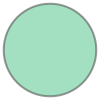

In [15]:
buffer

In [16]:
# Menghitung jarak antara dua titik
point1 = Point(0, 0)
point2 = Point(3, 4)
print(point1.distance(point2))  # Output: 5.0

5.0


In [20]:
# Membuat convex hull dari beberapa titik
points = MultiPoint([(0, 0), (1, 1), (1, 0), (0, 1)])
convex_hull = points.convex_hull
print(convex_hull)

POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))


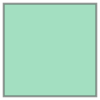

In [21]:
convex_hull

### Menggunakan Shapely untuk Membuat Kolom Geometri dalam GeoDataFrame

In [24]:
import pandas as pd
import geopandas as gpd

# Membuat DataFrame dengan koordinat
df = pd.DataFrame({
    'city': ['Jakarta', 'Bandung'],
    'longitude': [106.8456, 107.6191],
    'latitude': [-6.2088, -6.9175]
})

# Menggunakan Shapely untuk membuat kolom geometri
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Mengonversi DataFrame menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
gdf

,city,longitude,latitude,geometry
0,Jakarta,106.8456,-6.2088,POINT (106.8456 -6.2088)
1,Bandung,107.6191,-6.9175,POINT (107.6191 -6.9175)


/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_17982/4226243196.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['buffer'] = gdf.geometry.buffer(1)


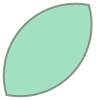

In [25]:
# Membuat buffer 1 derajat di sekitar setiap titik kota
gdf['buffer'] = gdf.geometry.buffer(1)

# Menemukan area perpotongan antara buffer
intersection = gdf['buffer'][0].intersection(gdf['buffer'][1])
intersection

### Contoh Studi Kasus: Mengidentifikasi Area yang Tumpang Tindih

In [27]:
# Membuat GeoDataFrame perumahan dan industri
df_housing = pd.DataFrame({
    'name': ['Perumahan A', 'Perumahan B'],
    'geometry': [Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]), Polygon([(1, 1), (3, 1), (3, 3), (1, 3)])]
})
gdf_housing = gpd.GeoDataFrame(df_housing, geometry='geometry')

df_industry = pd.DataFrame({
    'name': ['Industri X'],
    'geometry': [Polygon([(1, 0), (3, 0), (3, 2), (1, 2)])]
})
gdf_industry = gpd.GeoDataFrame(df_industry, geometry='geometry')

# Menemukan area perpotongan antara perumahan dan industri
overlap = gdf_housing.geometry.apply(lambda x: x.intersection(gdf_industry.unary_union))
overlap

/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_17982/2579995223.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  overlap = gdf_housing.geometry.apply(lambda x: x.intersection(gdf_industry.unary_union))


0    POLYGON ((1 0, 1 2, 2 2, 2 0, 1 0))
1    POLYGON ((1 1, 1 2, 3 2, 3 1, 1 1))
Name: geometry, dtype: geometry